# 目次
- Numpyとは？
    - なぜNumpyが必要？
    - Numpyの特徴とは？
    - ndarrayオブジェクト
    - Numpyを使う際の注意点
- 実際に使ってみる
    - インポートする
    - 簡単な演算
    - 関数を使ってみよう
        - np.reshape
- Numpyの基礎
    - ndarrayの生成関数
        - np.array, np.asarray
        - np.arange
        - np.ones, np.ones_like
        - np.zeros, np.zeros_like
        - np.linspace
        - その他
    - Numpyのデータ型
    - インデックス参照
        - スライス
        - ファンシーインデックス参照
    -  ユニバーサル関数（ufunc）
- 科学技術計算のためのモジュール
    - 線形代数（np.linalg）
    - 乱数生成（np.random）
    - フーリエ変換（np.fft）
- ndarrayのファイル入出力    
    - npyとnpz形式でのバイナリ保存
    - テキストでの保存

# Numpyとは？
**Numpy**は、標準の演算が遅いというPythonの欠点を補うために開発された高速なベクトル演算をサポートするライブラリです。  
Pythonで科学技術計算をする上では必須と言っても良いライブラリです。  
（本稿の大部分は、「[Pythonによるデータ分析入門](https://www.oreilly.co.jp/books/9784873116556/)（O'REILLY）」の第４章を参考にして書かれています。  
この本は翻訳もわかりやすく、とても読みやすい本なのでおすすめです。）
## なぜNumpyが必要？
C言語やFortranのような**静的型付け言語（コンパイル時に型を決定する言語）**では、配列や変数を宣言する際、型を明示的にコンパイラに伝えます。  
このようにコンパイルの段階で型が決まっていると、マシンとしては余計な動作をする必要が無いために効率よくメモリを使用できる上に高速に動作します。  
一方、Pythonのような**動的型付け言語（実行時に型を決める言語）**では、そのような高速な動作を失う代わりに、型を気にせずにリストに入れたり、宣言の手間が省けたりと、柔軟で短いコードが書けるようになります。  
しかし、科学技術計算においては動作の遅さは致命的になります。  
もしPythonで科学技術計算しようとするならば、高速な動作が必要になるところでは型を指定して高速な計算ができるようにする必要があります。  
そこで生まれたのが**Numpy**です（Numerical Pythonの略）。  
Numpyでは、C言語の配列をPythonで扱いやすいオブジェクト（ndarray）として使うことで、**高速でありながら柔軟なプログラミング**が可能です。  
また、CやFortranと同様に大規模配列を扱うことにも長けているため、使いこなせればかなり強力なツールです。  
Numpyは非常に高機能であり、全ての機能を1ページで説明することは難しいです。  
本稿では、詳しい実装には立ち入らず、とりあえず使えるようになることを目的としています。
## Numpyの特徴とは？
ざっとNumpyの特徴を上げてみると、
- ベクトル演算をベースにした省メモリで高速な多次元配列（ndarrayオブジェクト）
- 行列演算（逆行列など）や乱数生成、フーリエ変換を簡単に呼び出せる
- PythonとC, C++, Fortranとの連携を可能にするインターフェイスの提供
- バイナリやテキストでのファイル入出力を簡単にできる

のようなものがあります。  
行列演算などの実装はCやFortranで使われているライブラリを使用しており、同等の速度を発揮します。  
## ndarrayオブジェクト
Numpyで配列と言うとき、たいていndarray（N-dimensional array）オブジェクトのことを指します。  
ndarrayはCの配列に加え、その形状や型、関数などを情報として持っています。  
本稿でも、特に断らない限り、配列はndarrayのことを意味することにします。
## Numpyを使う際の注意点
Numpyも万能ではなく、得意ではない処理もあります。それは、配列要素ごとに回すforループです。  
要素ごとにforループを回すと、Pythonの遅さが如実に出てしまい、Numpyの利点が活かせません。  
Numpyが本当に力を発揮するのは**ベクトル演算**であり、それは並列化によって実現されています。  
もし、要素ごとの計算をしたい場合は、
- CやFortranでその部分だけを書き、それをPythonで呼び出す
- NumbaやCythonといった他のライブラリを使用しコンパイルを行う

と言った方法があります。  
まずはなるべくベクトル化を試みて、それが難しい場合は上記のような手段を考えてみると良いでしょう。  

# 実際に使ってみる
## インポートする

In [1]:
import numpy as np    #慣習でnpと名付けることが多い

インポートに失敗する場合、numpyがそもそもインストールされていない可能性があります。その場合以下のようなコマンドを実行してください。  
- Anacondaの場合「conda install numpy」
- pipの場合「pip install numpy」

condaはコンパイル済みのものをインストールするためにインストールエラーが起きにくいです。  
pipはインストール時にコンパイルするため、コンパイルエラーが起きる場合があります。  

## ndarrayの構造

さっそく、一次元配列を作ってみましょう。np.array関数にリストやタプルを渡すことで作ることが出来ます。  

In [2]:
x = np.array([1., 0.01, 0.7])
x

array([ 1.  ,  0.01,  0.7 ])

In [3]:
# xが何のオブジェクトか表示する
type(x)

numpy.ndarray

In [4]:
# xの形状
x.shape

(3,)

In [5]:
# xの型（この場合８バイト浮動小数点型）
x.dtype

dtype('float64')

In [6]:
# xの次元
x.ndim

1

ndarrayの重要な属性として、**shape**、**dtype**があります。  
**shape**は、まさに配列の形状で、多次元配列であれば、軸に沿った要素の個数をそれぞれの軸について並べたタプルです。一次元であれば、(n,)のようなタプルになります。タプルの要素が一つしか含まれない場合、(n)とすると単なるnになってしまうので、(n,)のようにカンマを付ける必要があります。  
**dtype**は、配列の型を表すものです（floatやint、complexなど）。  
**ndim**は、配列の次元を表します。 上の場合、１次元配列なのでndim=1です。   
**type()**はPythonの組み込み関数で、何のオブジェクトかを教えてくれます（dtypeとは違うものなので注意）。  
いくつか例を挙げましょう。

多次元配列はこのように定義できます。

In [7]:
# ２×３の２次元配列を定義
y = np.array([
        [1., 0.1, 3.],
        [3., 20., 0.07]
        ])
y

array([[  1.  ,   0.1 ,   3.  ],
       [  3.  ,  20.  ,   0.07]])

In [8]:
# 形状
y.shape

(2, 3)

In [9]:
# 型は１次元と同様
y.dtype

dtype('float64')

In [10]:
# 次元（つまりlen(y.shape)と等しい）
y.ndim

2

整数を入れると、intとして配列を作ります。

In [11]:
# 整数を入れた場合
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [12]:
# 自動的に４バイトintと型推論している
x.dtype

dtype('int32')

もちろん複素数も扱えます。

In [13]:
# 複素数を入れた場合
x = np.array([1.j, 3 + 6j, 9])
x

array([ 0.+1.j,  3.+6.j,  9.+0.j])

In [14]:
# 実部、虚部それぞれ８バイトの１６バイト複素数
x.dtype

dtype('complex128')

### 要素へのアクセス
また、各要素にアクセスするためには、リストやタプルのようにインデックスを指定します。  
多次元配列でのアクセスは、リストなどと違う記法なので注意してください。  

In [15]:
x = np.array([1., 2., 3.,])
x[0] # ==> 1.0

#スライスも使える（小さいndarrayが返ってくる）
x[1:] # ==> [ 2.,  3.]

# 多次元配列の場合
x = np.arange(20).reshape(4,5)
# ==> [[ 0,  1,  2,  3,  4],
#          [ 5,  6,  7,  8,  9],
#          [10, 11, 12, 13, 14],
#          [15, 16, 17, 18, 19]]
# まず0~19までの一次元配列を作り、そのshapeを変更して４×５の２次元配列を作っている。

x[0,1] #==> 1
x[1,-1] #==> 9 （負のインデックスは後ろから数えたもの。x[1,4]と等価）

x[3]  # １次元配列を取り出す
# ==> [15, 16, 17, 18, 19]

#一つの軸でのスライスでは次元は変わらず、shapeだけが小さくなる（２×５の多次元配列に）。
x[2:4] 
# ==> [[10, 11, 12, 13, 14],
#          [15, 16, 17, 18, 19]]

#複数の軸でのスライスも可能。
x[2:4, 2:4]  # ２×２
# ==> [[12, 13],
#          [17, 18]]

array([[12, 13],
       [17, 18]])

## 簡単な演算
スカラーとの四則演算は普通のベクトルのような書き方ができます（Fortranと一緒）。  
このような演算はリストやタプルでは出来ないので、そのためにndarrayに変換することもよくあります。

In [16]:
x = np.array([1., 0.01, 0.7])
x + 1 # ==> [ 2.  ,  1.01,  1.7 ]
2 * x # ==> [ 2.  ,  0.02,  1.4 ]
x / 1e5 # ==> [  1.00000000e-05,   1.00000000e-07,   7.00000000e-06]

array([  1.00000000e-05,   1.00000000e-07,   7.00000000e-06])

同じ形状の配列同士の四則演算は、要素ごとに演算した結果になります。  
（異なる形状の配列であっても、場合によっては演算できることがあり、それを**ブロードキャスト**と言います（後述））

In [17]:
x = np.array([8., 0.3, 90])
y = np.array([4., 0.2, 150])
x + y # ==> [  12. ,    0.5,  240. ]
x - y # ==> [  4. ,   0.1, -60. ]
x * y # ==> [  3.20000000e+01,   6.00000000e-02,   1.35000000e+04]
x / y # ==> [ 2. ,  1.5,  0.6]

array([ 2. ,  1.5,  0.6])

多次元配列でも同じように要素ごとの演算になります。  
行列演算がしたい場合は、np.dot関数を用いるか、Python3.5以降であれば@マークを使えます。

In [18]:
# ３×３行列を作成
A = np.arange(9).reshape(3,3)
# ==> [[0, 1, 2],
#          [3, 4, 5],
#          [6, 7, 8]]

# ３×３の単位行列の２倍
B = np.eye(3) * 2
# ==> [[ 2.,  0.,  0.],
#          [ 0.,  2.,  0.],
#          [ 0.,  0.,  2.]]

# 要素ごとの積になる
A * B
# ==> [[  0.,   0.,   0.],
#          [  0.,   8.,   0.],
#          [  0.,   0.,  16.]]

# 行列積
np.dot(A, B)
# ==> [[  0.,   2.,   4.],
#          [  6.,   8.,  10.],        2*Aと等しくなっている
#          [ 12.,  14.,  16.]]

# ndarrayオブジェクトはdot関数を持っているため、このようにも書ける
A.dot(B)
# ==> [[  0.,   2.,   4.],
#          [  6.,   8.,  10.],        2*Aと等しくなっている
#          [ 12.,  14.,  16.]]

# Python3.5以降であれば、行列積を@で記述可
A @ B
# ==> [[  0.,   2.,   4.],
#          [  6.,   8.,  10.],
#          [ 12.,  14.,  16.]]

array([[  0.,   2.,   4.],
       [  6.,   8.,  10.],
       [ 12.,  14.,  16.]])

## 関数を使ってみよう
### np.reshape
Numpyを使っていると、しょっちゅう出会うのがこのreshape関数です。  

In [19]:
a = np.arange(10).reshape(2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

文字通り、ndarrayのshapeを変更する関数なのですが、２つほど注意する点があります。  
一つ目は、全体のsizeを変更しないようにしなければならないということです。  
つまり、新しいshapeの各要素を掛け合わせた値が元々の要素の総数を一致する必要があるということです。

In [20]:
#ndarray.sizeは配列に含まれるデータの総数（必ずスカラーになる）
a.size

10

In [21]:
# total sizeが変化しているので怒られる
a.reshape(1000, 100000)

ValueError: total size of new array must be unchanged

逆に言うと、sizeが同じであるならば、どのようなshapeでも作ることが出来ます。

In [22]:
a.reshape(1, 1, 2, 1, 5)

array([[[[[0, 1, 2, 3, 4]],

         [[5, 6, 7, 8, 9]]]]])

このような変形は、次元の異なる配列同士の計算をするために用いることがあります（ブロードキャスト）。  
また、reshapeの引数に-1を入れると、sizeを変えないようなshapeを計算してくれます。  

In [23]:
a = np.arange(10)
a.reshape(-1, 5) # reshape(2,5)と等価

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

二つ目の注意する点は、reshapeによって返ってくるndarrayは、元々のndarrayと同じメモリを参照している点です。  
つまり、reshapeによって返ってきたndarrayを書き換えると、オリジナルも変化するということです。  
このような参照をコピーと対比させて、**ビュー**と言います。

In [24]:
b = np.arange(10)
c = b.reshape(2,5)
c[0, 0] = 100
b

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

科学技術計算の上ではこの性質は重要です。なぜなら、大規模な配列をいちいちreshapeのたびにコピーされると困るからです。  
もし、オリジナルを書き換えたくないならば、**copy**関数を使う必要があります。

In [25]:
b = np.arange(10)
c = b.reshape(2,5).copy() # copyは複製したndarrayを返す
c[0, 0] = 100
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### (発展) reshapeの実装を詳しくみてみる
C言語では、多次元配列であってもメモリ上に連続に配置され、インデックスを１変えたときに参照する位置を１次元の場合よりも大きくジャンプさせることであたかも隣接しているかのように操作することが出来ます。  
shapeを変えるということは、ある軸のインデックスが１増えたときにメモリ上への参照を何バイトだけジャンプするかを変更することを意味します。  
このジャンプの量を**strides**といいます。

In [26]:
b = np.arange(10)
c = b.reshape(2,5)
c.strides

(20, 4)

In [27]:
# int32型なので一つの値を表現するために４バイト必要
c.dtype # ==> dtype('int32')

# 同じ値になる
c[1,0] # ==> 5
b[5] # ==> 5

5

In [28]:
# cとbは同じデータを共有しているとTrueを返す
c.base is b

True

In [29]:
# コピーされたものはデータを共有しない
c.base is b.copy()

False

この例では、変数cの一つ目の軸（axis 0といいます）のインデックスが１増えたとき、メモリの参照を20バイト飛ばすということです。  
今、dtypeがint32で一つの変数が4バイトなので、int32型の5個分先に移動することになります。  
したがって、b[5]とc[1,0]が（参照しているメモリアドレスについても）等しくなるということです。  
C言語の多次元配列は、後ろの軸であればあるほどメモリが隣接するような設計になっています。  
１次元配列を多次元配列に変更するときには、２つの流派があります。  
一つは、C言語と同じように、後ろの軸が隣接するようなもの（**行優先**)と、Fortranのように前の方の軸が隣接するようなもの（**列優先**)です。  
reshape関数は、キーワード引数orderがあり、この２つを選べるようになっています。  
もちろん、そこまで使う機会はないと思うのですが（デフォルトで十分）、このような実装を理解しておくと、困ったときに対処しやすいと思います。

In [30]:
# C言語での多次元配列（デフォルトの動作）
np.arange(10).reshape(2,5, order="c")

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [31]:
# Fortranでの多次元配列
np.arange(10).reshape(2,5, order="F")

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

#### reshape関数まとめ
- sizeを変化させない。引数に-1を使うと便利。
- reshapeはコピーではなくビューを返す。コピーしたいときはcopy()を使う。

# Numpyの基礎
## ndarrayの生成関数
色々な配列を作る便利な関数が用意されています。ここではそれらを紹介します。
### np.array, np.asarray
上でも述べた関数です。リストやタプルを引数に取り、配列を返す関数です。  
型を指定しない場合は、勝手に推測してくれますが、キーワード引数で指定することも出来ます。
np.asarrayは引数がndarrayであれば、そのままndarrayを返し、そうでないならnp.arrayと同じ働きをする関数です。

In [32]:
# dtypeを指定
np.array([1, 2, 3], dtype=float).dtype # ==> dtype('float64')

#指定しない場合は推測してくれる
np.array([1, 2, 3]).dtype # ==> dtype('int32')

dtype('int32')

### np.arange
Python組み込み関数のrange()と同じ働きをする関数で、ndarrayを返します。  
stepには少数も入れることが出来ます。

In [33]:
# 引数が一つの場合、stopのみ。start=0となる
np.arange(10) # ==> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
np.arange(10.) # ==> [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]
np.arange(10, dtype=float) # ==> [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]

# 引数が２つの場合、startとstopになる（stopは含まない）
np.arange(3, 10) # ==> [3, 4, 5, 6, 7, 8, 9]

#引数が３つの場合、start, stop, stepになる
np.arange(0, 1, 0.1) # ==> [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]
np.arange(start=0, stop=1, step=0.1) #上と等価

# 整数ステップ
np.arange(0, 20, 4) # ==> [ 0,  4,  8, 12, 16]

array([ 0,  4,  8, 12, 16])

### np.ones, np.ones_like
np.onesは、引数で与えられたshapeで、全ての要素が１であるようなndarrayを返します。  
np.ones_likeは、引数にndarrayを取り、そのndarrayのshapeと同じshapeで全ての要素が１となるndarrayを返します。

In [34]:
#１次元の場合はスカラーを引数に与えることが可能
np.ones(5) # ==> [ 1.,  1.,  1.,  1.,  1.]
# np.ones((5,))と等価

# 多次元配列の場合、タプルを引数にしなければならない（2×２×２行列）
np.ones((2,2,2))
# ==> [[[ 1.,  1.],
#           [ 1.,  1.]],
#
#          [[ 1.,  1.],
#           [ 1.,  1.]]]

#デフォルトではfloatなので、dtypeをintにしてみる
np.ones(5, dtype=int) # ==> [1, 1, 1, 1, 1]

A = np.arange(10).reshape(2,5)
A.shape # ==> (2, 5)
np.ones_like(A)
# ==> [[1, 1, 1, 1, 1],
#          [1, 1, 1, 1, 1]]

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

### np.zeros, np.zeros_like
全ての要素を0にする他は、np.ones, np.ones_likeと同じなのでそちらを見てください。

### np.empty, np.empty_like
上の２つと似ていますが、こちらは初期化をせずに配列の領域だけを確保する関数です。  
巨大な配列を自分で初期化したい場合や、値は何でもいいが配列だけ作りたいときに使います。   
初期化のプロセスを省略するためにnp.zerosなどよりも高速に動作します。  
ときどき変な値が入ってることがあるので、自分で初期化するときのみ使うのが吉です。

In [35]:
# 2048個のbool型の中にあるTrueの個数（実行するたびに変化する）
np.empty(2048, dtype=np.bool).sum()

106

### np.linspace
start, stopの２つを引数に取り、startからendまで均等に分けた配列を返します。  
キーワード引数としてnumがあり、均等に分ける個数を指定できます。デフォルトではnum=50です。  

> np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

endpointはstopを含むかどうかをBooleanで渡す引数です。

In [36]:
np.linspace(0, 1)

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])

In [37]:
#この２つは等価
np.linspace(0, np.pi, 10)
np.linspace(0, np.pi, num=10)

array([ 0.        ,  0.34906585,  0.6981317 ,  1.04719755,  1.3962634 ,
        1.74532925,  2.0943951 ,  2.44346095,  2.7925268 ,  3.14159265])

In [38]:
#endpoint=Falseの場合。stopの値を含まない。
np.linspace(0, np.pi, 10, endpoint=False)

array([ 0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339])

### np.eye, np.identity
この２つは単位行列を生成する関数で、違いはほとんどありません。

In [39]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

## Numpyのデータ型
既に出てきたように、ndarrayには様々なdtypeが存在します。  
基本的には精度の高い型が使われているためにそこまで意識する必要はないかもしれませんが、Cなどと連携するときやバイナリ入出力のときには考えないといけないこともあると思います。  
表でまとめると以下のようになります。C言語、Fortranでの対応する型も書いています。  

|型|説明|C言語|Fortran|
|:--:|:-----:|:------:|:--------:|
|int32 / uint32|符号あり/なし　32ビット整数型（４バイト）|long もしくは int|INTEGER|
|int64 / uint64|符号あり/なし　64ビット整数型（８バイト）|long long int|INTEGER(8)|
|float32|単精度浮動小数点数型|float|REAL もしくはREAL(4)|
|float64|倍精度浮動小数点数型|double|REAL(8)|
|complex64|実部・虚部それぞれ単精度|float complex|COMPLEX もしくは COMPLEX(4)|
|complex128|実部・虚部それぞれ倍精度|double complex|COMPLEX(8)|
|bool|真偽値（TrueとFalse）|(bool)|LOGICAL|
|object|任意のPythonオブジェクト| | |
|string_|固定長文字列型|char*|CHARACTER(LEN=○)|
|unicode_|固定長ユニコード文字列型| | | |

ndarrayのdtypeのキャストは**astype**を使います。

In [40]:
a = np.arange(10)
a 
# ==> array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

a.dtype 
# ==> dtype('int32')

b = a.astype(np.float64)
b 
# ==> array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

b.dtype 
# ==> dtype('float64')

# stringからfloatへのキャスト
np.array(["123.", "-0.0001", "6.843e256"]).astype(np.float64)

array([  1.23000000e+002,  -1.00000000e-004,   6.84300000e+256])

## インデックス参照
Numpyでは、部分配列の取り出し方に様々な種類があり、使いこなせると便利です。  
ただ、取り出し方が**コピー**であるか**ビュー（参照）**であるかを混乱することがあるので、チェックしておいてください。  
### スライス
Pythonのリストやタプルにも実装されているスライスをndarrayに対してするとその部分配列が**ビュー（参照）**で返ってきます。  
つまり、その部分配列を書き換えると元々の配列も変わるということです。  
スライスは高速に動作するので、使えるときはガンガン使っていきましょう。  
一例を見てみます。

In [41]:
arr = np.arange(16).reshape(4, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [42]:
# スライスする（２×２行列のビューができる）
arr_sliced = arr[1:3, 1:3]
arr_sliced

array([[ 5,  6],
       [ 9, 10]])

In [43]:
# スライスした部分配列の要素に全て-1を代入する
arr_sliced[:,:] = -1

# オリジナルの配列
arr

array([[ 0,  1,  2,  3],
       [ 4, -1, -1,  7],
       [ 8, -1, -1, 11],
       [12, 13, 14, 15]])

オリジナル配列のスライスされた部分が全て-1に変わっていることがわかります。   
多次元配列のスライスは、一つ一つの軸を順番にスライスしていって小さくなっていくと考えると分かりやすいと思います。  
直接ビューに代入することも出来ます。

In [44]:
arr = np.arange(16).reshape(4, 4)

# 一個飛ばし
arr[::2, ::2] = 100
arr

array([[100,   1, 100,   3],
       [  4,   5,   6,   7],
       [100,   9, 100,  11],
       [ 12,  13,  14,  15]])

ビューのshapeと同じshapeを持つ配列を使って代入することも出来ます。

In [45]:
arr = np.arange(16).reshape(4, 4)

# ２×２行列で各要素が-50の配列を作る
arr_small = -50 * np.ones((2, 2))

# インデックス１から一個飛ばし（２×２のスライス）
arr[1::2, 1::2] = arr_small
arr

array([[  0,   1,   2,   3],
       [  4, -50,   6, -50],
       [  8,   9,  10,  11],
       [ 12, -50,  14, -50]])

 変わってほしくないときは、reshapeの場合と同様に、コピーしなくてはなりません。  

In [46]:
# 同様のオリジナル配列を作る
arr = np.arange(16).reshape(4,4)

# ndarray.copy関数は自分自身を複製したndarrayを返す
arr_sliced = arr[1:3,1:3].copy()

# 全要素に-1を代入
arr_sliced[:,:] = -1

# オリジナル配列は変化していない
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

コピーをするともちろんオリジナルは変化しません。  

#### 代入時の注意点
配列に値や配列を代入するときには、意識的にスライスを使うようにした方がいいです。  
例えばスカラーを配列の全要素に代入しようとしたとき、スライスを使わないと、配列を表していた変数が、新しく代入しようとしたスカラーを表す変数に置き換わってしまう事があります。  

In [47]:
a = np.arange(10)

# ↓-100をaの全要素に代入するつもりで書いた
a = -100
a # 配列ですらなくなっている！？

-100

ひと目見ただけでも面倒なバグを生みそうな気配がします。  

配列に配列を代入するときはもっと深刻なバグの原因になるので気を付けるべきです。  
コピーされたものだと思ってオリジナルを書き換えていると、コピー先が変わっているということが起こり得ます。  
このようなバグはスカラーの場合と異なり、気付きにくいエラーなので要注意です。  
例えば、配列aの値を配列tempに保存して、aを書き換えたい状況だとします。  

In [48]:
a = np.arange(10)
temp = np.empty_like(a)

# aの要素をtempの要素に代入したつもりだったが・・・
temp = a

# aを書き換えると
a[:] = -1

temp # tempも変わってしまっている

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

この問題を避けるためには、２つの手段があります。  
一つ目は（自分自身だとしても）スライスを使うということです。

In [49]:
a = np.arange(10)
temp = np.empty_like(a)

# 自分自身のスライスに代入
temp[:] = a

a[:] = -1

temp # 値が書き換わっていない

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

もう一つは、コピーを渡すことです。  
前もって配列を用意する必要がないために素早く書ける方法なので、比較的小さな配列であればおすすめ出来ます。  
ただ、コピーを作ることは新しい配列を作るということなので、コンピュータにとっては負担が大きくなる可能性があります。  
巨大配列であれば、スライスによって配列を再利用すれば、メモリの節約になるだけでなく、計算速度が上る可能性が高いです。

In [50]:
a = np.arange(10)
# temp = np.empty_like(a) # 先にメモリを確保する必要がない

# コピーを渡す
temp = a.copy()

a[:] = -1

In [51]:
a = np.arange(10)
# temp = np.empty_like(a)

# コピーを渡す
temp = a.copy()

a[:] = -1

temp # 値が書き換わっていない

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### ファンシーインデックス参照
スライスよりも柔軟に部分配列を取り出せるインデックス参照がファンシーインデックス参照です。  
Numpyの使いやすさを格段に上げる機能であり、使う機会も多くなると思います。  
ただし、これはビューではなく、コピーを返すことに注意してください。  
インデックスに配列を入れることで、対応する軸を抜き出すということをしてくれます。

In [52]:
# １次元の場合
a = np.linspace(0, 1, 9)
a

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ])

In [53]:
# ファンシーインデックス参照の一例
# 配列（ndarrayやリスト、タプルなど）をインデックスに入れると、部分配列（コピー）を返す
b = a[ [1, 3, 6, 0] ]
b

array([ 0.125,  0.375,  0.75 ,  0.   ])

In [54]:
# コピーであることの確認
# bを書き換えたとしても・・・
b[:] = 100

# 元の配列は変わらない
a

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ])

多次元配列の各軸のインデックスに配列を入れると、その軸を抜き出します。  
インデックスに用いるリストによってどのような形状の配列が返ってきているかを確認してください。

In [55]:
# 多次元配列を定義
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [56]:
# axis 0にリストを入れた場合（arr[2]とarr[1]を抜き出すことになる）
arr[[2, 1]]

array([[6, 7, 8],
       [3, 4, 5]])

In [57]:
# axis 1にリストを入れた場合（arr[:, 2]とarr[:, 0]を抜き出すことになる）
arr[:, [2, 0]]

array([[2, 0],
       [5, 3],
       [8, 6]])

In [58]:
# axis0, axis1のどちらにも同じ長さのリストを入れた場合
# arr[2, 2]とarr[1, 0]を抜き出した１次元配列が返ってくる
arr[[2, 1], [2, 0]]

array([8, 3])

ファンシーインデックス参照の記法を用いて、代入ができます。  
ファンシーインデックス参照そのものはコピーを返すのですが、代入のときはビューに代入しているかのように扱えます。

In [59]:
# １次元配列
arr1 = np.arange(10)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
# スカラーを代入するとすべての要素がその値に置き換わる（スライスと同じような動作）
arr1[[2, 0, 8, 3]] = 100
arr1

array([100,   1, 100, 100,   4,   5,   6,   7, 100,   9])

In [61]:
# 配列を代入すると、対応する値に置き換わる（shapeが同じである必要がある）
arr2 = np.arange(10)
arr2[[6, 3, 7, 1]] = np.arange(100, 104)
arr2

array([  0, 103,   2, 101,   4,   5, 100, 102,   8,   9])

## ユニバーサル関数（ufunc）
Numpyでは、三角関数(np.sinなど）や指数関数（np.exp）のような関数は**ユニバーサル関数オブジェクト（略すとufunc）**になっています。  
[公式ドキュメント](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)によると、ufuncは、要素ごと（element-by-element）にndarrayへ作用する関数であるという説明があります。  
そして、Numpyに標準で入っているufuncは、コンパイルされたC言語で実装されているということも書かれています。  
ufuncの関数による計算結果はndarrayで返ってきます。


In [62]:
# 0からpiまで
x = np.linspace(0, np.pi, 10)

# ufuncの一つであるnp.sinをxに作用させると、要素ごとにsin関数を作用させたものが配列として返ってくる
np.sin(x)

array([  0.00000000e+00,   3.42020143e-01,   6.42787610e-01,
         8.66025404e-01,   9.84807753e-01,   9.84807753e-01,
         8.66025404e-01,   6.42787610e-01,   3.42020143e-01,
         1.22464680e-16])

ufuncは、Pythonのループの遅さという欠点を補うために生まれ、そしてより便利な機能も追加されています。  
例えば、ラジアン（弧度法）から度（度数法）を変換するufuncなどがあります。  

In [63]:
# ラジアンから度への変換
np.rad2deg(x)

array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,  180.])

In [64]:
# 引数が二個の例：累乗を要素ごと、1**3, 2**4, 3**1を計算している
np.power([1, 2, 3], [3, 4, 1])

array([ 1, 16,  3], dtype=int32)

ufuncはとても数が多いので、[公式HP](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)を参照してください。

# 科学技術計算のためのモジュール
Numpyでは、C言語のライブラリをPythonから簡単に呼び出すことができるモジュールが用意されています。   
このような他言語のライブラリの関数をPythonで呼び出せるようにしたものを**ラッパー（wrapper）**といいます（包み込むイメージ）。  
これらはNumpyをインポートしたらすぐに使うことが出来ます。  

## [線形代数（np.linalg）](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
**np.linalg**は、元々Fortranで書かれた[**LAPACK**](http://www.netlib.org/lapack/)がC言語に変換されたものをラップしたものです。  
LAPACKの関数と一対一に対応しているわけではなく、より単純なインターフェイスで呼び出せるようになっています。  
逆行列を求めたり、固有値分解、特異値分解など線形代数を網羅するライブラリです（詳細は上のリンクを参照）。  

In [65]:
# ３×３の二次元行列
A = np.random.rand(3, 3)
A

array([[ 0.81113153,  0.08398089,  0.81946805],
       [ 0.32487136,  0.84201693,  0.5770126 ],
       [ 0.16722265,  0.52675866,  0.89728486]])

In [66]:
# 逆行列を求めるinv関数
B = np.linalg.inv(A)
B

array([[ 1.20497372,  0.95074669, -1.71186472],
       [-0.52035885,  1.57640531, -0.53850042],
       [ 0.08091593, -1.10262814,  1.74963647]])

In [67]:
# 積を取ると単位行列になる
A @ B

array([[  1.00000000e+00,  -4.68458491e-18,  -3.79172515e-17],
       [  4.42867150e-17,   1.00000000e+00,   3.38783009e-17],
       [  4.63608425e-17,  -1.54767808e-16,   1.00000000e+00]])

Numpyの強みの一つとして、１次元配列をスカラーにする計算のように次元が下がる関数であれば、多次元配列を引数に取ることが出来、軸を指定することによって、その軸に沿った一括計算が可能になります。  
分かりにくいので例をあげます。  
１次元配列をスカラーにするような関数としてノルムを取る**norm**関数があります。

In [68]:
# normを取る（ようするにユークリッドノルム）
np.linalg.norm([3., 4.])

5.0

このnorm関数に多次元配列を渡し、軸を指定すると、その軸に沿ってノルムを取ります。  
つまりその軸がスカラーに縮約され、軸がなくなります。  
例えば、shapeが(5, 3)の配列で軸１を指定すると、その軸に沿ってノルムが計算され、shapeが(5,)の配列が返されます。

In [69]:
# 多次元配列を定義
arr = np.arange(15).reshape(5, 3)
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [70]:
# 軸１についてノルム関数を適用する
np.linalg.norm(arr, axis=1)

array([  2.23606798,   7.07106781,  12.20655562,  17.3781472 ,  22.56102835])

In [71]:
# 軸１（横方向）を潰すようにノルムを取る
np.linalg.norm(arr, axis=1)

array([  2.23606798,   7.07106781,  12.20655562,  17.3781472 ,  22.56102835])

## [乱数生成（np.random）](https://docs.scipy.org/doc/numpy/reference/routines.random.html)
科学技術計算で広く使われている擬似乱数生成器である**メルセンヌ・ツイスター**をラップしているモジュールです。  
高品質でかつ、高速な乱数生成で有名なライブラリです。  
np.randomでは、様々な確率分布で乱数を生成できるような関数群が用意されています（[Distributions](https://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions)）。  
主な関数を表にまとめました。

|関数名|説明|
|:-----:|:--:|
|rand|一様乱数|
|randn|標準正規分布乱数|
|randint|整数乱数|
|choice|与えられたndarrayからランダムに選び出す|
|normal|正規分布乱数|

どの関数もshapeまたはsizeが指定でき、簡単に乱数を生成できます。

In [72]:
# 一様乱数を求める
np.random.rand(10)

array([ 0.87547085,  0.42373036,  0.62681704,  0.00652193,  0.39994336,
        0.21348584,  0.60716915,  0.40849877,  0.24338223,  0.53254521])

In [73]:
# ３×３の標準正規分布乱数
np.random.randn(3, 3)

array([[ 0.38035506, -0.66246883,  0.24152916],
       [ 1.2759454 , -0.3211881 ,  0.32568444],
       [-0.5614904 , -0.04308281, -1.4738546 ]])

In [74]:
# 任意のオブジェクトのリストからランダムに取り出す
np.random.choice(list("abcde"), size=10)

array(['c', 'd', 'd', 'd', 'd', 'c', 'c', 'a', 'd', 'a'], 
      dtype='<U1')

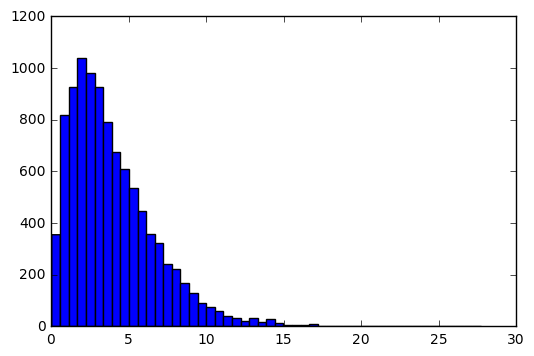

In [75]:
# ガンマ分布のヒストグラム
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(np.random.gamma(2.0, scale=2.0, size=10000), bins=50)
pass

## [フーリエ変換（np.fft）](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)
Cooley-Tukey型の高速離散フーリエ変換（FFT)のラッパーです。  
フーリエ変換一般に言えることですが、変換と逆変換の係数が実装によって異なります（定数倍するだけですが）。  
実装の詳細を知りたい人は [Implementation details](https://docs.scipy.org/doc/numpy/reference/routines.fft.html#implementation-details) を参照してください。  
下の表は[様々な関数](https://docs.scipy.org/doc/numpy/reference/routines.fft.html#standard-ffts)をまとめたものです。  

|関数名|説明|
|:-:|:-:|
|fft|１次元FFT|
|ifft|↑の逆変換|
|rfft|１次元実FFT|
|irfft|↑の逆変換|
|fft2|２次元FFT|
|ifft2|↑の逆変換|
|rfft2|２次元実FFT|
|irfft2|↑の逆変換|



In [76]:
# FFT
np.fft.fft([1., 3, 5, 3, 1])

array([ 13.00000000+0.j        ,  -4.23606798-3.07768354j,
         0.23606798+0.72654253j,   0.23606798-0.72654253j,
        -4.23606798+3.07768354j])

In [77]:
# 実FFT
res = np.fft.rfft([1., 3, 5, 3, 1])
res

array([ 13.00000000+0.j        ,  -4.23606798-3.07768354j,
         0.23606798+0.72654253j])

In [78]:
# 逆実FFT
np.fft.irfft(res)

array([ 1.19098301,  4.72982477,  5.42705098,  1.65214124])

In [79]:
# 逆実フーリエ変換
np.fft.irfft(res, n=5)

array([ 1.,  3.,  5.,  3.,  1.])

信号処理の一例です。  
フィルターなどの高度な信号処理は[**scipy.signal**](https://docs.scipy.org/doc/scipy/reference/signal.html)を用いてください。

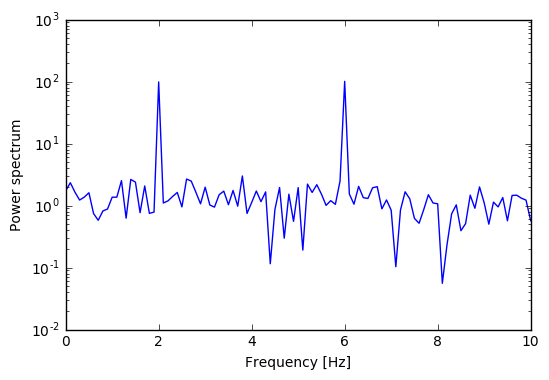

In [80]:
# サンプリング周波数（ナイキスト周波数＝10Hz）
rate = 20 # [1/s]

# サンプル時刻 [s]
t = np.arange(0, 10, 1/rate)

# 2Hzと6Hzにピークを持つシグナル（に正規分布ノイズを加えたもの）
signal = np.sin(2*np.pi*2*t) + np.sin(2*np.pi*6*t) + 0.1 * np.random.randn(t.size)

# power spectrum
p = np.abs(np.fft.rfft(signal))

# サンプリングレート（の逆数）を与えると各成分の周波数を返す
f = np.fft.rfftfreq(signal.size, d=1./rate)

plt.xlabel("Frequency [Hz]")
plt.ylabel("Power spectrum")
plt.yscale("log")
plt.plot(f, p)

# ndarrayのファイル入出力


Numpyでファイル出力する場合、
- 「.npyまたは.npz」形式でのバイナリ保存
- テキストでの保存
- 一般的なバイナリ保存

の３つが基本となります。本稿では上の２つを説明します。    
## npyとnpz形式でのバイナリ保存
これらはNumpy独自のバイナリ形式です。  
**np.save**関数では、ndarrayを **npy** という拡張子を付けて保存します。  
この形式だと、配列のshapeやdtypeなどの情報も保存するので、**np.load**で情報を保ったまま読み込むことが出来ます。  
複数のndarrayを保存するときは **np.savez** 関数を用いて、**npz** という拡張子で保存します。  
npz形式の場合のロードも **np.load** 関数を使います（拡張子で判断される）。  
まずはnpyの保存をみてみましょう。

In [81]:
arr = np.linspace(3, 4, 100).reshape(10, 10, 1)

# arrをnpy形式で保存
np.save("test_arr.npy", arr)

# npyをロード
arr_new = np.load("test_arr.npy")

# 全ての要素が等しいならTrue
np.all(arr == arr_new)

True

npzでは、キーワード引数を渡すと、その名前で保存されます。

In [82]:
my_x = np.linspace(0,  1, 10) ** 3
my_y = np.arange(0, 10)

# キーワード引数でndarrayをsavezに渡す
np.savez("test_arrs.npz", x = my_x, y = my_y)

arrs = np.load("test_arrs.npz")

arrs["x"]

array([ 0.        ,  0.00137174,  0.01097394,  0.03703704,  0.0877915 ,
        0.17146776,  0.2962963 ,  0.47050754,  0.70233196,  1.        ])

## テキストでの保存
ndarrayをテキスト形式で保存する関数は**np.savetxt**です。

In [83]:
# ２次元配列
x = np.linspace(0, 1, 10).reshape(5,2)

# xをテキスト形式で保存
np.savetxt("my_np.txt", x)

In [84]:
# 保存したテキストファイルを表示
!cat my_np.txt

0.000000000000000000e+00 1.111111111111111049e-01
2.222222222222222099e-01 3.333333333333333148e-01
4.444444444444444198e-01 5.555555555555555802e-01
6.666666666666666297e-01 7.777777777777776791e-01
8.888888888888888395e-01 1.000000000000000000e+00
